# Dados Brutos

In [126]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('State_of_data_2022.csv', sep = ',')

In [7]:
df.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')","('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_1 ', 'Analytics Engineer')","('P3_b_2 ', 'Engenharia de Dados/Data Engineer')","('P3_b_3 ', 'Analista de Dados/Data Analyst')","('P3_b_4 ', 'Cientista de Dados/Data Scientist')","('P3_b_5 ', 'Database Administrator/DBA')","('P3_b_6 ', 'Analista de Business Intelligence/BI')","('P3_b_7 ', 'Arquiteto de Dados/Data Architect')","('P3_b_8 ', 'Data Product Manager/DPM')","('P3_b_9 ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as

Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle

# Filtrando dados

In [8]:
# Removendo o ID
df = df.drop("('P0', 'id')", axis = 1)

In [9]:
# Separando por partes
df_parte_1 = df.filter(like = 'P1', axis = 1)
df_parte_2 = df.filter(like = 'P2', axis = 1)
df_parte_3 = df.filter(like = 'P3', axis = 1)
df_parte_4 = df.filter(like = 'P4', axis = 1)
df_parte_5 = df.filter(like = 'P5', axis = 1)
df_parte_6 = df.filter(like = 'P6', axis = 1)
df_parte_7 = df.filter(like = 'P7', axis = 1)
df_parte_8 = df.filter(like = 'P8', axis = 1)

# Analisando a Satisfação

Uma das análises que pode ser realizada com base na vivência dos profissionais da área de dados é o grau de satisfação destes com o seu vínculo empregatício atual. Na pesquisa foram realizadas perguntas que averiguam a satisfação - essa é do tipo booleana, que aceita resposta True ou False - e também os motivos de insatisfação, assim como pretensão de mudar de emprego etc. 

As perguntas referentes a satisfação profissional estão na parte 2 do dataframe. Para avaliar primeiro a satisfação, pode-se analisar a contagem de profissionais que dizem estar satisfeitos, para isso pode-se utilizar o groupby.

([<matplotlib.patches.Wedge at 0x17b81e5c790>,
 [Text(0.7533017917872387, 0.8015836890120307, 'Insatisfeito'),
  Text(-0.7533017917872387, -0.8015836890120306, 'Satisfeito')],
 [Text(0.41089188642940283, 0.4372274667338349, '26.0%'),
  Text(-0.41089188642940283, -0.43722746673383484, '74.0%')])

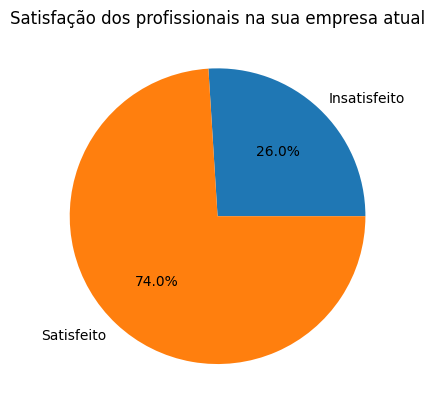

In [92]:
coluna_satisfação = "('P2_k ', 'Você está satisfeito na sua empresa atual?')"
df_satisfacao = df_parte_2.groupby(coluna_satisfação)[coluna_satisfação].count()
labels = 'Insatisfeito', 'Satisfeito'
plt.title('Satisfação dos profissionais na sua empresa atual')
plt.pie(df_satisfacao, labels = labels, autopct='%1.1f%%')

Percebe-se pelo gráfico que grande parte dos profissionais encontram-se **satisfeitos**. Antes de analisar o que leva a insatisfação de tais profissionais, podemos analisar a satisfação por gênero do profissional, avaliando assim para qual gênero há maior grau de realização profissional. Para isso foi aplicada uma máscara em todo o dataFrame a fim de obter os profissionais distintos em gênero e a partir da separação aplicado groupby e count para obter a contagem de profissionais satisfeitos e insatisfeitos. 

([<matplotlib.patches.Wedge at 0x17bff6da810>,
 [Text(0.7747460240383967, 0.7808768137399754, 'Insatisfeito'),
  Text(-0.774746097149357, -0.7808767412030142, 'Satisfeito')],
 [Text(0.42258874038458, 0.42593280749453205, '25.1%'),
  Text(-0.42258878026328567, -0.42593276792891677, '74.9%')])

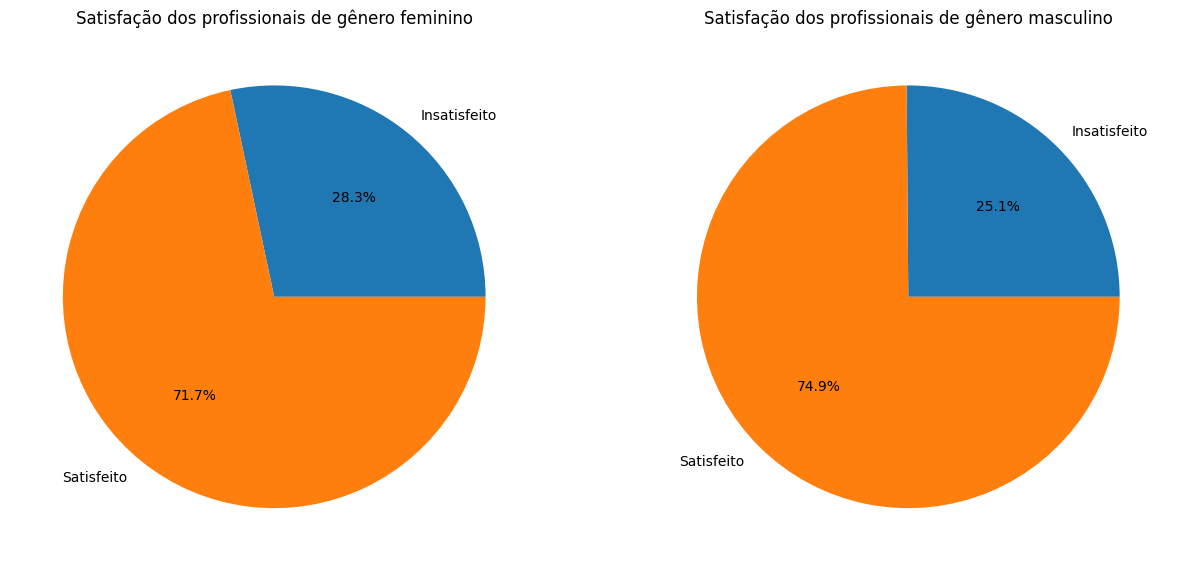

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
labels = 'Insatisfeito', 'Satisfeito'

coluna_genero = "('P1_b ', 'Genero')"
df_genero_feminino = df[df[coluna_genero] == "Feminino"]
df_satisfacao_feminino = df_genero_feminino.groupby(coluna_satisfação)[coluna_satisfação].count()

ax[0].set_title('Satisfação dos profissionais de gênero feminino')
ax[0].pie(df_satisfacao_feminino, labels = labels, autopct='%1.1f%%')

df_genero_masculino = df[df[coluna_genero] == 'Masculino']
df_satisfacao_masculino = df_genero_masculino.groupby(coluna_satisfação)[coluna_satisfação].count()

ax[1].set_title('Satisfação dos profissionais de gênero masculino')
ax[1].pie(df_satisfacao_masculino, labels = labels, autopct='%1.1f%%')

É possível notar que o gênero do profissional não demonstra significativa relevância com o seu grau de satisfação na empresa atual. A diferença percentual entre profissionais insatisfeito de diferentes gêneros é apenas cerca de **3%**. 

Quanto aos motivos de insatisfação, os dados são referentes a questão P2_l e os motivos citados são:

1. Falta de oportunidade de crescimento no emprego atual;
2. Salário atual não corresponde ao mercado;
3. Não tenho uma boa relação com meu líder/gestor;
4. Gostaria de trabalhar em em outra área de atuação;
5. Gostaria de receber mais benefícios;
6. O clima de trabalho/ambiente não é bom;
7. Falta de maturidade analítica na empresa.

Para verificar os motivos de insatisfação será aplicado a parte 2 dos questionário uma máscara para insatisfação igual a False e feita uma partição que abrange às 7 respostas mapeadas. Há no questionários outras respostas de insatisfação em termos abertos, mas como são muito particulares não serão aplicadas análise. 


Text(0.5, 1.0, 'Principais motivos de insatisfação entre os profissionais')

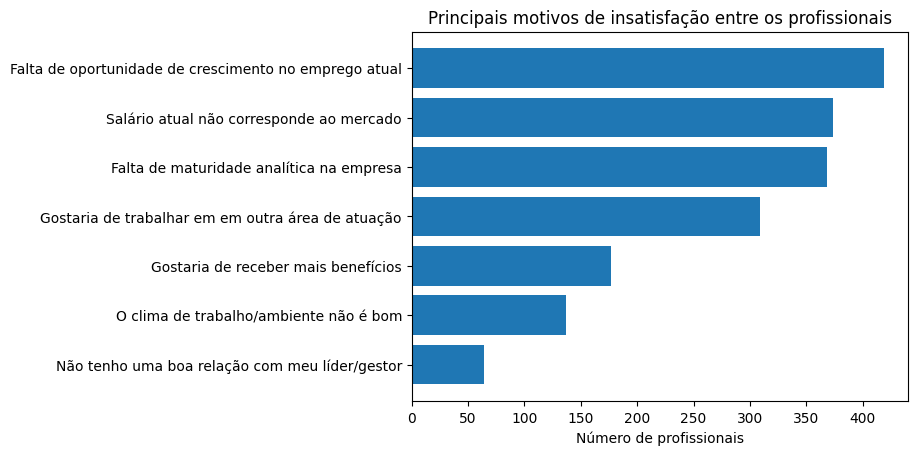

In [122]:
df_insatisfeitos = df_parte_2[df_parte_2[coluna_satisfação] == False]
df_motivo_insatisfacao = df_insatisfeitos.loc[:,"('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')":"('P2_l_7 ', 'Falta de maturidade analítica na empresa')"]
df_insatisfacoes = df_motivo_insatisfacao.sum().sort_values()

indexes_motivo_insatisfaçao = 'Não tenho uma boa relação com meu líder/gestor','O clima de trabalho/ambiente não é bom','Gostaria de receber mais benefícios','Gostaria de trabalhar em em outra área de atuação','Falta de maturidade analítica na empresa','Salário atual não corresponde ao mercado','Falta de oportunidade de crescimento no emprego atual'
values_motivo_insatisfação = df_insatisfacoes.values

plt.barh(indexes_motivo_insatisfaçao, values_motivo_insatisfação)
plt.xlabel('Número de profissionais')
plt.title('Principais motivos de insatisfação entre os profissionais')

É importante ressaltar que esses são os motivos mais apresentados, entretanto um profissional insatisfeito poderia marcar mais que um motivo para insatisfação, de modo que o total de respostas ultrapassa o número de participantes que responderam a essas questões. 

Quando questionados sobre estarem **buscando emprego ou pretenderem mudar de emprego nos próximos 6 meses** foram apresentadas as seguintes opções:

1. 'Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses';
2. 'Estou em busca de oportunidades dentro ou fora do Brasil';
3. 'Não estou buscando, mas me considero aberto a outras oportunidades';
4. 'Estou em busca de oportunidades, mas apenas fora do Brasil'.


Podemos ver que há mais profissionais em busca ou abertos a novas oportunidades de emprego que insatisfeitos, ressaltando que a insatisfação com seu emprego atual não é a única força motriz para a troca de empresa. 

([<matplotlib.patches.Wedge at 0x17b82dff050>,
 [Text(0.7178368642034024, 0.8334927932445644, 'Sim, dentro ou fora do brasil'),
  Text(-0.4775129559687527, 0.9909497347908138, 'Sim, apenas fora do Brasil'),
  Text(-1.0999602189687465, -0.009355035340787219, 'Não'),
  Text(0.4478092637436623, -1.0047222816805443, 'Não estou buscando, mas estou aberto a oportunidades')],
 [Text(0.3915473804745831, 0.4546324326788532, '27.4%'),
  Text(-0.2604616123465924, 0.5405180371586257, '9.6%'),
  Text(-0.5999783012556799, -0.005102746549520301, '26.4%'),
  Text(0.24425959840563397, -0.5480303354621151, '36.7%')])

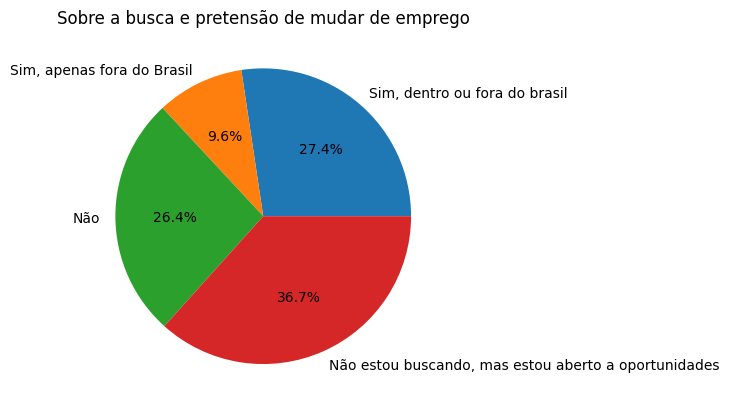

In [107]:
coluna_busca_emprego = "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')"
df_busca_emprego = df_parte_2.groupby(coluna_busca_emprego)[coluna_busca_emprego].count().sort_index()

labels = 'Sim, dentro ou fora do brasil', 'Sim, apenas fora do Brasil', 'Não', 'Não estou buscando, mas estou aberto a oportunidades'
plt.title('Sobre a busca e pretensão de mudar de emprego')
plt.pie(df_busca_emprego, labels = labels, autopct='%1.1f%%')

Quando questionados sobre os principais critérios que são levados em consideração no momento de decidir onde trabalhar, dado 10 opções de respostas, a distribuição de profissionais foi conforme mostrado no gráfico abaixo. Esta refere-se a pergunta P2_o do dataFrame e, assim como nos motivos de insatisfação, aqui um profissional poderia assinalar mais que uma alternativa. 

A alternativa mais apontada é a Remuneração/Salário e a segunda com maior número de assinalantes é a Flexibilidade de trabalho remoto, o que vem em tendência ao mercado pós pandêmico, em que após a implementação de modelo remoto muitos dos colaboradores entendem os benefícios desse modelo ao seu bem-estar e busca por oportunidades que o tragam isso. 




Text(0.5, 1.0, 'Principais critérios no momento de decidir onde trabalhar')

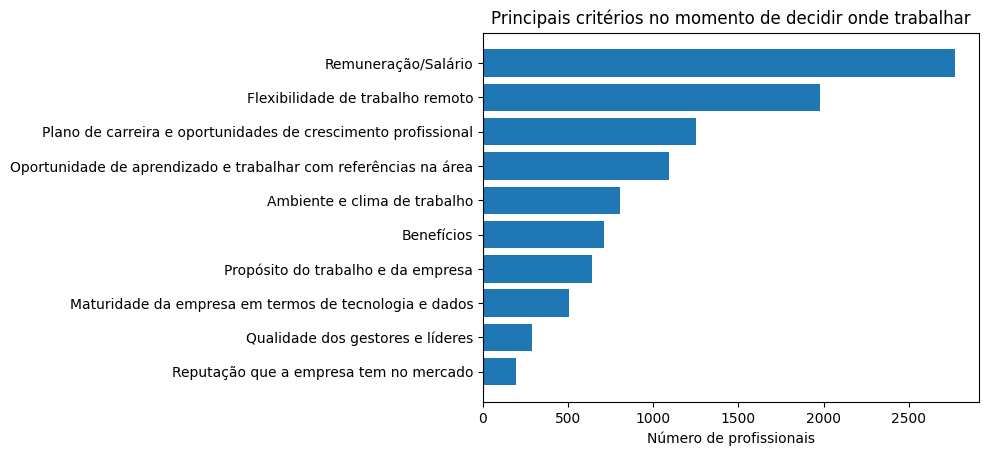

In [124]:
df_motivo_emprego = df_parte_2.loc[:,"('P2_o_1 ', 'Remuneração/Salário')":"('P2_o_10 ', 'Reputação que a empresa tem no mercado')"]
df_motivos = df_motivo_emprego.sum().sort_values()

index_motivo_emprego = 'Reputação que a empresa tem no mercado','Qualidade dos gestores e líderes','Maturidade da empresa em termos de tecnologia e dados','Propósito do trabalho e da empresa', 'Benefícios', 'Ambiente e clima de trabalho','Oportunidade de aprendizado e trabalhar com referências na área',  'Plano de carreira e oportunidades de crescimento profissional', 'Flexibilidade de trabalho remoto', 'Remuneração/Salário'

plt.barh(index_motivo_emprego, df_motivos.values)
plt.xlabel('Número de profissionais')
plt.title('Principais critérios no momento de decidir onde trabalhar')

A preferência pelo trabalho remoto também pode ser notada ao questionar o modelo de trabalho ideal para os profissionais. **52,5%** dos profissionais preferem o **modelo híbrido flexível** (em que eles podem ir presencialmente nos dias que optarem por isso) e **39,1%** preferem o **modelo remoto**. Entretanto ao analisarmos cruzarmos os dados com o modelo atual de trabalho, em torno de **28,7% ainda trabalham em modelo presencial ou Híbrido com dias fixos de trabalho** - ou seja, dias fixos para ir presencialmente ao escritório. 

Essa tendência é vista de maneira crescente após o período pandêmico. 

([<matplotlib.patches.Wedge at 0x17b84b76a10>,
 [Text(1.0987527238175587, 0.052368424680293235, '100% presencial'),
  Text(1.0468537981234278, 0.33778265993764967, 'Híbrido com dias fixos'),
  Text(-0.20369289381034214, 1.0809760427554205, '100% remoto'),
  Text(-0.08597862788609995, -1.096634704697432, 'Híbrido flexível')],
 [Text(0.5993196675368502, 0.028564595280159942, '1.5%'),
  Text(0.5710111626127787, 0.18424508723871796, '6.9%'),
  Text(-0.11110521480564116, 0.5896232960484111, '39.1%'),
  Text(-0.04689743339241815, -0.5981643843804174, '52.5%')])

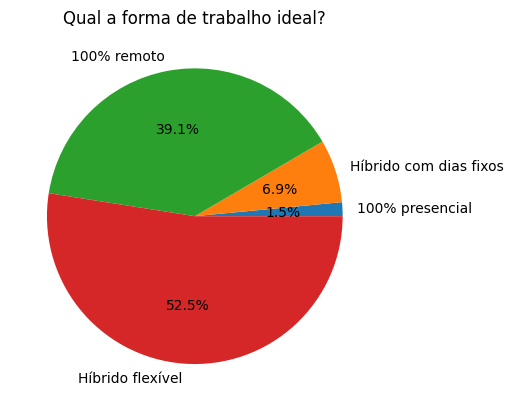

In [119]:
coluna_trabalho_ideal = "('P2_q ', 'Qual a forma de trabalho ideal para você?')"

df_forma_ideal = df_parte_2.groupby(coluna_trabalho_ideal)[coluna_trabalho_ideal].count().sort_values()
labels = '100% presencial', 'Híbrido com dias fixos', '100% remoto', 'Híbrido flexível'
plt.title('Qual a forma de trabalho ideal?')
plt.pie(df_forma_ideal, labels = labels, autopct='%1.1f%%')

### Qual a função de um engenheiro de dados? 

O engenheiro de dados é de maneira geral o responsável por coletar, organizar e implementar a infraestrutura necessárias aos dados. 

Ele é o profissional responsável pela criação do pipeline, manter o pipeline em execução para a coleta de dados etc. 

No gráfico abaixo, vemos de forma generalizada o que entrevistados responderam que costumam fazer no seu dia a dia:

- Desenvolvimento de pipelines: Desenvolver os pipelines nas mais diversas linguagens, como Python, Scala, Java etc.

- ETL: construção de ETL em ferramentas como Pentaho, Talend, Dataflow etc., Modelagem dos dados, cuidar da manutenção de repositórios. 

- Consultas de dados: criar consultas em SQL;

- Integração de fontes de dados: desenvolver APIs para integrar diferentes fontes de dados;

- Arquitetura de dados: Modelar soluções de arquitetura de dados, criar componentes de ingestão de dados, transformação e recuperação da informação;

- Qualidade: Cuidar da qualidade dos dados, metadados e dicionário de dados;


	> Essa pergunta segue o mesmo modelo da anterior onde o entrevistado pode responde mais de uma função.

In [127]:
def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

[Text(0, 0, '616'),
 Text(0, 0, '508'),
 Text(0, 0, '467'),
 Text(0, 0, '349'),
 Text(0, 0, '332'),
 Text(0, 0, '209'),
 Text(0, 0, '83'),
 Text(0, 0, '9')]

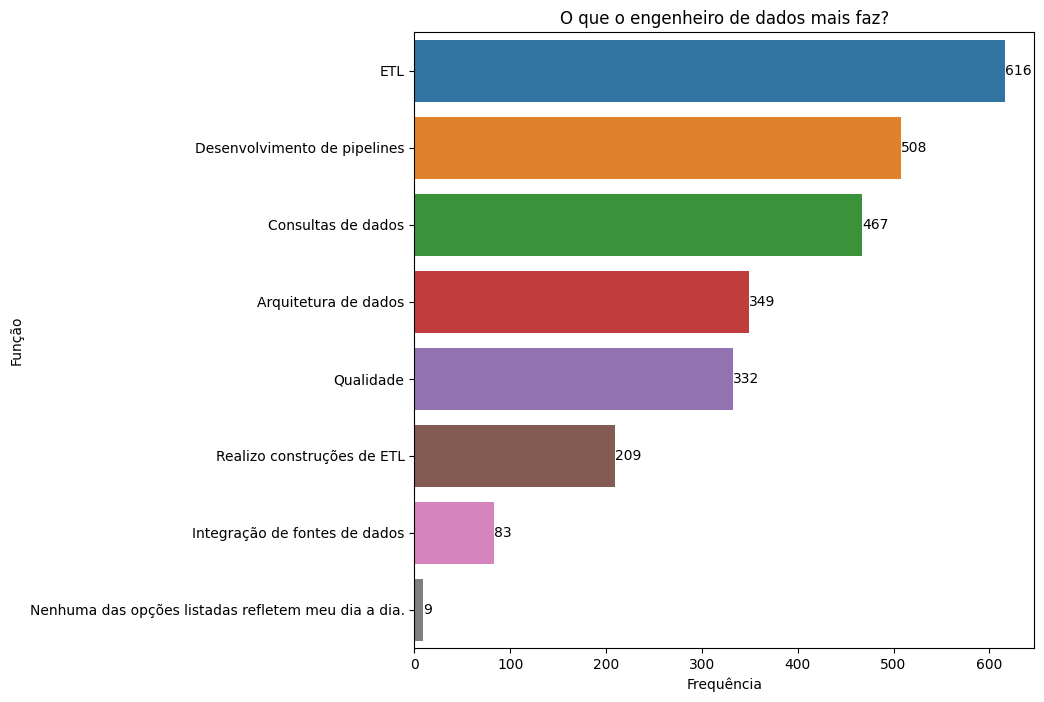

In [133]:
df_P6_a = df_parte_6.filter(like='P6_a_',axis=1).copy()

mascara_nomes_colunas = {col: extract_text_between_quotes(col)[1] for col in df_P6_a.columns}
df_P6_a.rename(columns=mascara_nomes_colunas, inplace=True)


df_P6_a_rename_dict = {'Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.':'Desenvolvimento de pipelines',
'Realizo construções de ETLs em ferramentas como Pentaho, Talend, Dataflow etc.':'ETL',
'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.':'Consultas de dados',
'Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.':'Integração de fontes de dados', 
'Modelo soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.':'Arquitetura de dados',
'Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.':'ETL',
'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.':'ETL', 
'Cuido da qualidade dos dados, metadados e dicionário de dados.':'Qualidade', 
'Nenhuma das opções listadas refletem meu dia a dia.':'Nenhuma das opções listadas refletem meu dia a dia.'}

df_P6_a = df_P6_a.rename(columns=df_P6_a_rename_dict)

df_P6_a = df_P6_a.transpose().apply(lambda col: col.sum(), axis=1)

df_P6_a = df_P6_a.reset_index()
df_P6_a.columns = ['Desc', 'Soma']
df_P6_a = df_P6_a.sort_values('Soma',ascending=False)

df_P6_a_top = df_P6_a.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P6_a_top


#Gráfico de barra
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(df_P6_a_top,y='Desc',x='Soma')
plt.title('O que o engenheiro de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')
ax.bar_label(ax.containers[0])
